
-  Through the comparison of yearly allocated cpu given to users, their usage and total available cpu, we witness an obvious declined usage portion with the increase of year. 
- Additionally, the allocations are much lower than available resources in recent 2 years, indicating there is only not under-usage but also insufficient utilization of available resources.

In [63]:
%run include/required_libs.py
%matplotlib inline

In [64]:
alloc = pd.read_csv('rawdata/allocs_by_cycle_group.csv')
alloc = alloc.groupby('cycle')['allocation'].sum().to_frame()
alloc = alloc.reset_index()
alloc

,cycle,allocation
0,2013,9245000.0
1,2014,25829000.0
2,2015,43630671.0
3,2016,51736375.0
4,2017,84270426.0
5,2018,106894557.0


In [65]:
avall = pd.read_csv('../rcc/rawdata/cluster_cores_by_cycles.csv')

In [66]:
usage = pd.read_csv('rawdata/usages_by_cycle_group.csv')
used = usage.groupby('cycle')['su'].sum().to_frame().reset_index()

gap_day = list(usage.groupby(['cycle']).count()['su'])[-1]   #Projection
used['su_projected'] = used['su']
used.iloc[-1, -1] = used['su'].iloc[-1] * 365 / gap_day 

used.to_csv('result/2_1_usages_by_clcly_(projection).csv', index=False)


used['total_su'] = avall['total_su']
used['allocation'] = alloc['allocation']

used['consumed'] = used['su_projected']/1000000
used['allocated'] = used['allocation']/1000000
used['available'] = used['total_su']/1000000
used = used.drop(['total_su', 'allocation','su','su_projected'], axis=1, inplace=False)


# correction of legacy
leg = pd.read_csv('rawdata/legacy_summary.csv')
used.loc[5,'consumed'] = sum(leg['usage'])/1000000 +used.loc[5,'consumed'] 

used.to_csv('result/2_1_allocs_usages_over_years.csv')
used

,cycle,consumed,allocated,available
0,2013,16.907530,9.245000,27.925112
1,2014,24.596786,25.829000,39.628809
2,2015,26.091431,43.630671,34.935164
3,2016,25.797905,51.736375,34.999115
4,2017,61.462770,84.270426,127.595111
5,2018,99.807392,106.894557,153.027033


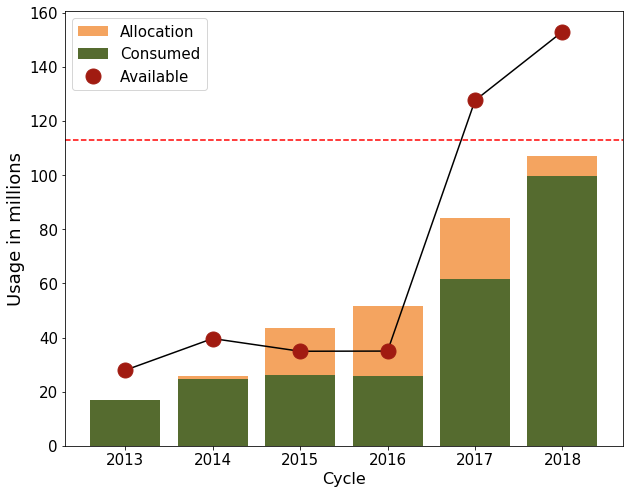

In [67]:
fig, ax = plt.subplots()

a = ax.bar(used.cycle, used['allocated'],color='#F4A460')
b = ax.bar(used.cycle, used['consumed'],color='#556B2F')
ax.plot(used.cycle, used['available'], color='black')
c,= ax.plot(used.cycle, used['available'], 'ko', color='#a11b11',markersize=15);

plt.legend((a,b,c),('Allocation','Consumed','Available'), fontsize=15);  ## lengend size  + rename legends
plt.ylabel('Usage in millions', fontsize=18)                             ## label size
plt.xlabel('Cycle', fontsize=16)

ax.xaxis.set_tick_params(labelsize=15)                                             ## tick size
ax.yaxis.set_tick_params(labelsize=15)
fig.set_size_inches(10, 8)                                                         ## figure size
plt.axhline(y=avall['broadwl'].iloc[-1]/1000000, color='r', linestyle='--');

fig.savefig('image/2_1_allocs_usages_over_years.png')